In [6]:
import numpyro.distributions as dist
from numpyro import plate,sample
from jax import random
from numpyro import handlers

In [2]:
xs = sample("x",dist.Normal(0,1),rng_key=random.PRNGKey(20))

In [3]:
xs

DeviceArray(-0.7446246, dtype=float32)

In [20]:
def model():
    #sample("X",dist.Normal(0,1))
    with plate("p",size=100000):
        sample("x",dist.Normal(0,1))

In [21]:
exec_trace =  handlers.trace( handlers.seed(model, random.PRNGKey(0))).get_trace()

In [22]:
import pprint as pp
pp.pprint(exec_trace) 

OrderedDict([('p',
              {'args': (100000, None),
               'cond_indep_stack': [],
               'fn': <function _subsample_fn at 0x7f4cdc0f23a0>,
               'kwargs': {'rng_key': None},
               'name': 'p',
               'scale': 1.0,
               'type': 'plate',
               'value': DeviceArray([    0,     1,     2, ..., 99997, 99998, 99999], dtype=int32)}),
             ('x',
              {'args': (),
               'cond_indep_stack': [CondIndepStackFrame(name='p', dim=-1, size=100000)],
               'fn': <numpyro.distributions.distribution.ExpandedDistribution object at 0x7f4c20483520>,
               'infer': {},
               'intermediates': [],
               'is_observed': False,
               'kwargs': {'rng_key': array([2718843009, 1272950319], dtype=uint32),
                          'sample_shape': ()},
               'name': 'x',
               'scale': None,
               'type': 'sample',
               'value': DeviceArray([-0.7

In [23]:
xs=exec_trace["x"]["value"]


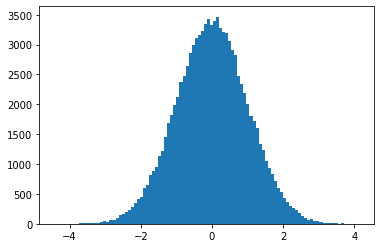

In [24]:
import matplotlib.pyplot as plt
plt.hist(xs,bins=100)
plt.show()